In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ple

In [9]:
fd=pd.read_csv("Flight_Booking.csv")
fd.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [11]:
#removing unnessary columns
fd=fd.drop(columns=['Unnamed: 0'])


In [12]:
fd.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
fd.shape

(300153, 11)

In [14]:
fd.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [16]:
fd.duplicated().sum()

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


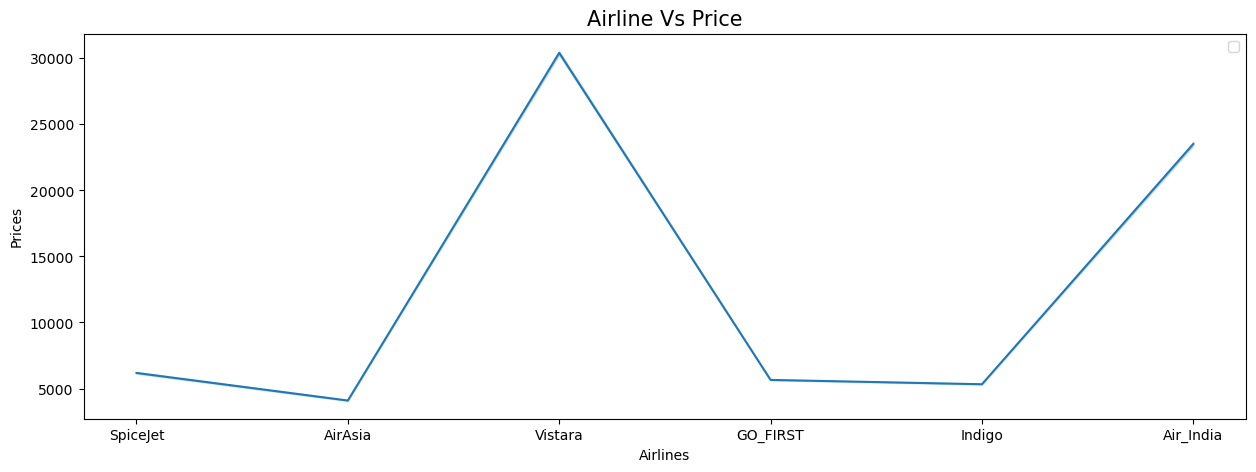

In [26]:
#price vs airlines visualisation
plt.figure(figsize=(15,5))
sns.lineplot(x=fd['airline'],y=fd['price'])
plt.title('Airline Vs Price',fontsize=15)
plt.xlabel("Airlines")
plt.ylabel("Prices")
plt.legend()
plt.show()

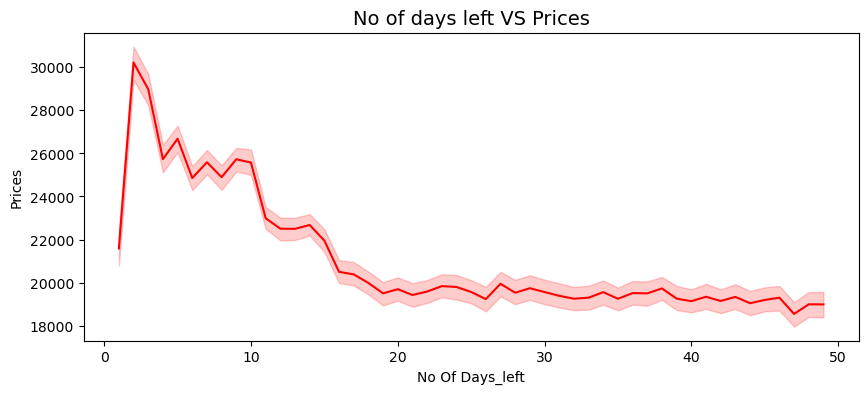

In [31]:
plt.figure(figsize=(10,4))
sns.lineplot(x=fd['days_left'],y=fd['price'],color='red')
plt.title("No of days left VS Prices",fontsize=14)
plt.xlabel('No Of Days_left')
plt.ylabel('Prices')
plt.show()

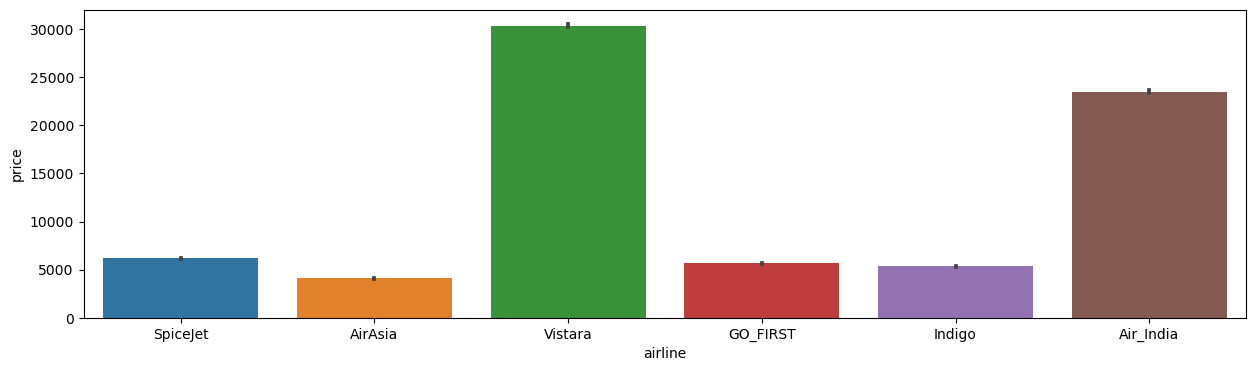

In [35]:
#price range of all flights
plt.figure(figsize=(15,4))
sns.barplot(x=fd['airline'],y=fd['price'])
plt.show()

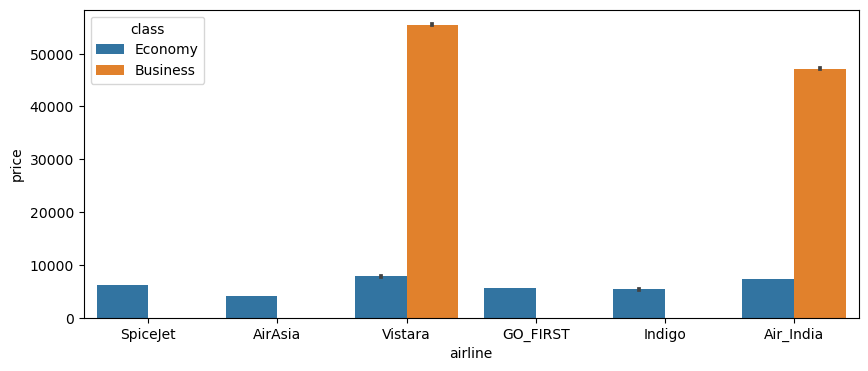

In [36]:
plt.figure(figsize=(10,4))
sns.barplot(x=fd['airline'],y=fd['price'],hue=fd['class'])
plt.show()

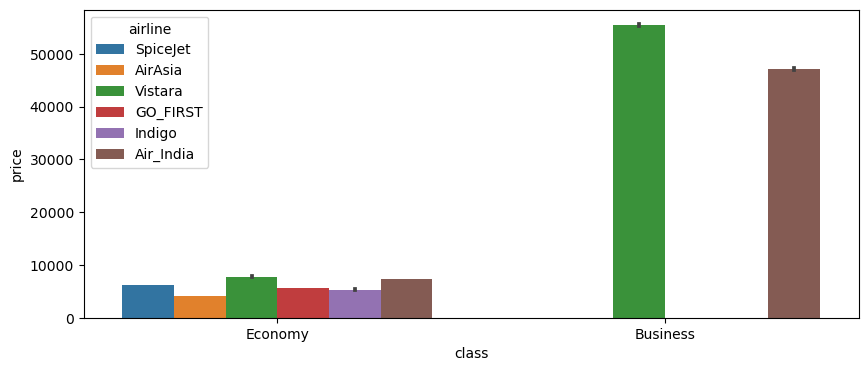

In [37]:
plt.figure(figsize=(10,4))
sns.barplot(x=fd['class'],y=fd['price'],hue=fd['airline'])
plt.show()

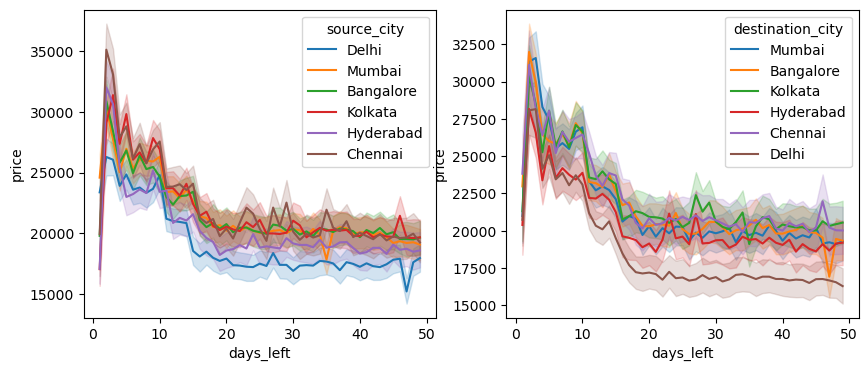

In [40]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.lineplot(x=fd['days_left'],y=fd['price'],hue=fd['source_city'],ax=ax[0])
sns.lineplot(x=fd['days_left'],y=fd['price'],hue=fd['destination_city'],ax=ax[1])
plt.show()

Text(0.5, 1.0, 'frequency of stops')

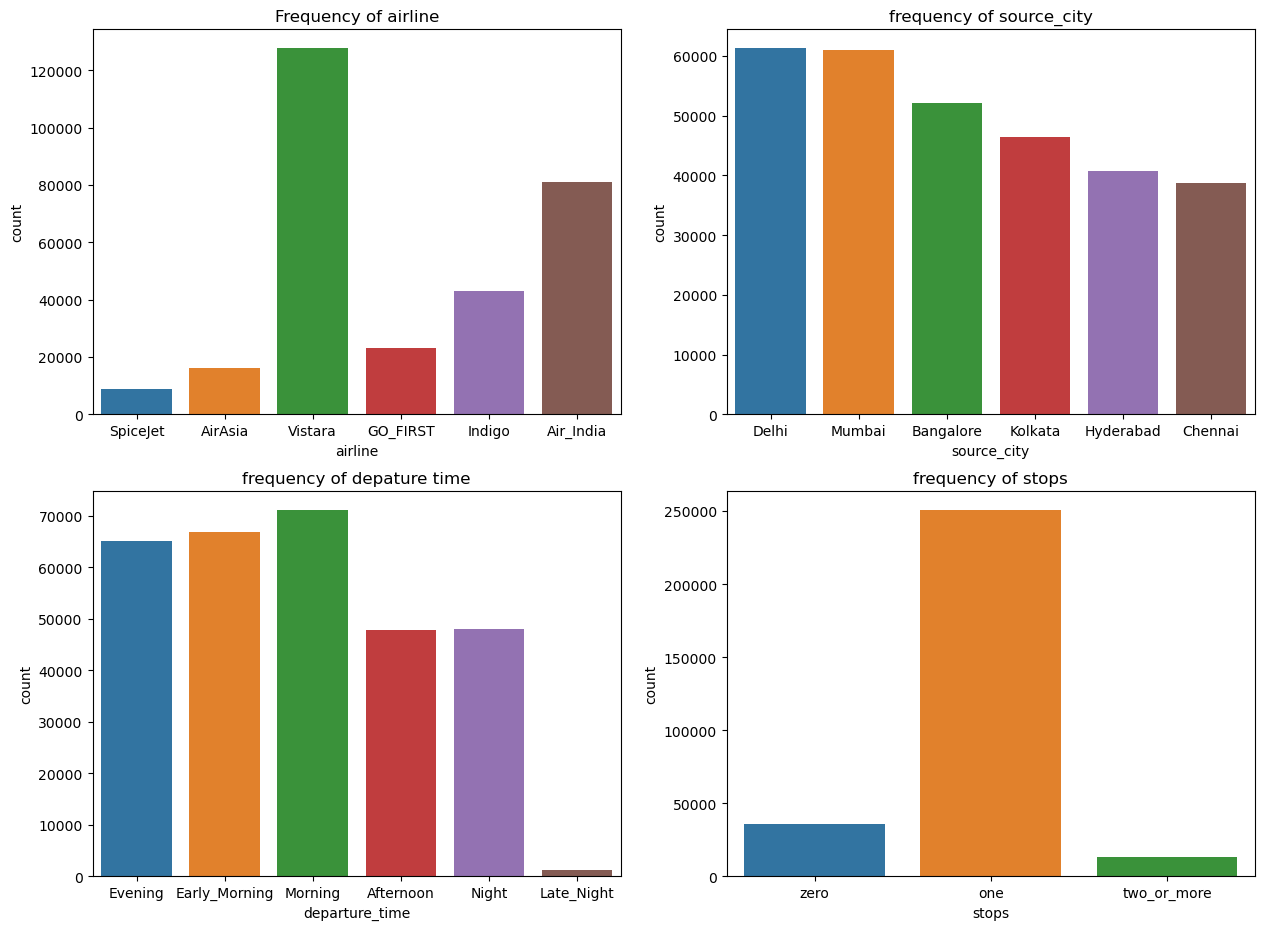

In [46]:
plt.figure(figsize=(15,23))


plt.subplot(4,2,1)
sns.countplot(x=fd['airline'])
plt.title("Frequency of airline")


plt.subplot(4,2,2)
sns.countplot(x=fd['source_city'])
plt.title('frequency of source_city')

plt.subplot(4,2,3)
sns.countplot(x=fd['departure_time'])
plt.title('frequency of depature time')

plt.subplot(4,2,4)
sns.countplot(x=fd['stops'])
plt.title('frequency of stops')

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in fd.columns:
    if fd[col].dtype=='object':
        fd[col]=le.fit_transform(fd[col])
fd.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [54]:
correlation=fd.corr()

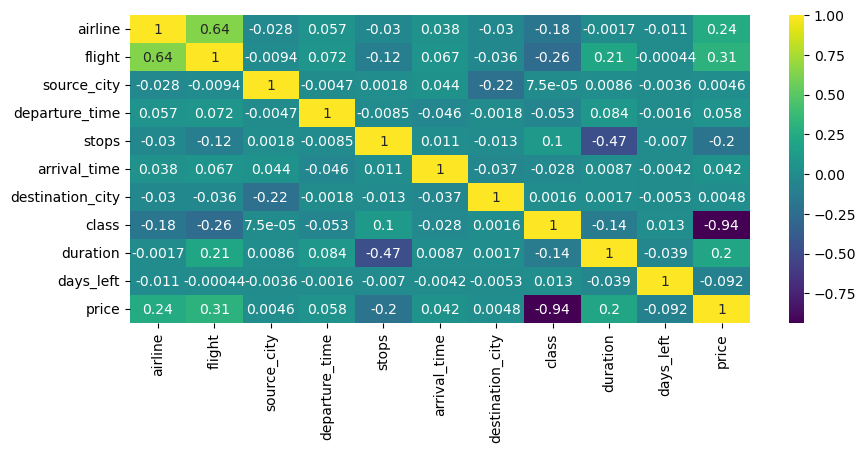

In [57]:
plt.figure(figsize=(10,4))
sns.heatmap(correlation,cmap='viridis',annot=True)
plt.show()

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in fd.columns:
    if ((fd[col].dtype!='object')& (col !='price')):
        col_list.append(col)
        
X=fd[col_list]
vif_dataframe=pd.DataFrame()
vif_dataframe['feature']=X.columns
vif_dataframe['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_dataframe)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [67]:
#varaince_inflation_factor is calculated for the colmns if the vif is>5 we drop that column

In [68]:
fd=fd.drop(columns=['stops'])

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in fd.columns:
    if ((fd[col].dtype!='object')& (col !='price')):
        col_list.append(col)
        
X=fd[col_list]
vif_dataframe=pd.DataFrame()
vif_dataframe['feature']=X.columns
vif_dataframe['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_dataframe)

            feature        VIF
0           airline   6.701787
1            flight  12.580589
2       source_city   2.943789
3    departure_time   2.777994
4      arrival_time   3.745147
5  destination_city   2.896438
6             class   2.777535
7          duration   3.956469
8         days_left   4.053072


In [71]:
X=fd.drop(columns=['price'])
y=fd['price']

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [75]:
le.fit(X_train,y_train)

LinearRegression()

In [77]:
y_pred=le.predict(X_test)

In [86]:
difference=pd.DataFrame(np.column_stack((y_test,y_pred)),columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,4647.294638
1,64831.0,51686.219437
2,6195.0,6619.828946
3,60160.0,55470.733720
4,6578.0,5124.702595
...,...,...
60026,5026.0,4950.113628
60027,3001.0,4517.788696
60028,6734.0,4961.939681
60029,5082.0,2531.171003


In [87]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import *

In [79]:
r2_score(y_test,y_pred)

0.897772460824212

In [92]:
from math import sqrt
mse=mean_squared_error(y_test,y_pred)
mse

52696484.315686174

In [93]:
rmse=np.sqrt(mse)
print(rmse)

7259.234416636935


In [94]:
mae=mean_absolute_error(y_test,y_pred)
mae

4464.482884309719

In [90]:
mape=mean_absolute_percentage_error(y_test,y_pred)
mape

0.3456524308006087

C:\Users\HP\AppData\Local\Temp\ipykernel_17404\2069385350.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)
C:\Users\HP\AppData\Local\Temp\ipykernel_17404\2069385350.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred)


Text(0.5, 1.0, 'Test VS Predicted')

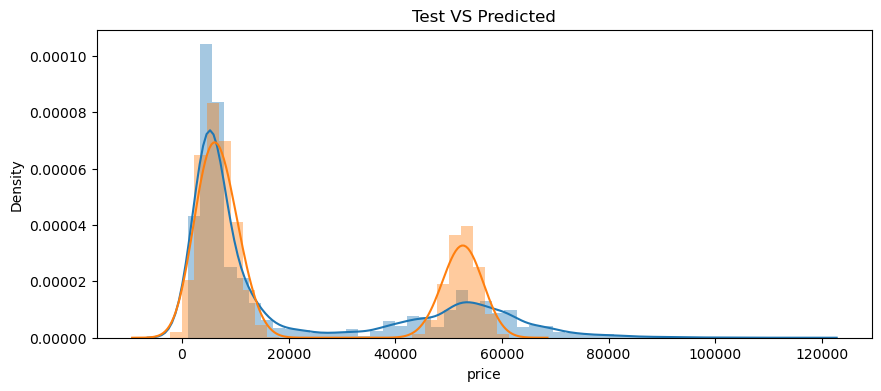

In [98]:
#plotiing test vs predicted distplot
plt.figure(figsize=(10,4))
sns.distplot(y_test)
sns.distplot(y_pred)
plt.title("Test VS Predicted")

# Decision Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor
de=DecisionTreeRegressor()

In [105]:
de.fit(X_train,y_train)

DecisionTreeRegressor()

In [106]:
y1_pred=de.predict(X_test)
y1_pred

array([ 5571., 53164.,  6195., ...,  6734.,  5082., 70049.])

In [119]:
rscore2=r2_score(y_test,y1_pred)
mae2=mean_absolute_error(y_test,y1_pred)
mape2=mean_absolute_percentage_error(y_test,y1_pred)
mse2=mean_squared_error(y_test,y1_pred)

rmse2=np.sqrt(mse1)

In [120]:
print("1:{},2:{},3:{},4:{},5:{}".format(rscore2,mae2,mape2,mse2,rmse2))



1:0.955293123409223,2:1839.481540093174,3:0.10816645296070075,4:23045602.389176704,5:4800.583546734366


In [114]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [115]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [116]:
rfpred=rf.predict(X_test)

In [121]:
rscore3=r2_score(y_test,rfpred)
mae3=mean_absolute_error(y_test,rfpred)
mape3=mean_absolute_percentage_error(y_test,rfpred)
mse3=mean_squared_error(y_test,rfpred)

rmse3=np.sqrt(mse1)

In [123]:
print("r2:{},mae:{},mape:{},mse:{},rmse:{}".format(rscore3,mae3,mape3,mse3,rmse3))

r2:0.9713619570536046,mae:1681.5982407932488,mape:0.09514101602239017,mse:14762403.488570936,rmse:4800.583546734366


C:\Users\HP\AppData\Local\Temp\ipykernel_17404\2814385079.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)
C:\Users\HP\AppData\Local\Temp\ipykernel_17404\2814385079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfpred)
No artists with labels found to put in legend.  Note that ar

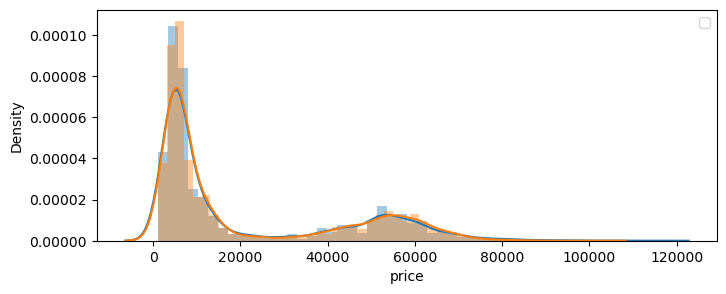

In [128]:
plt.figure(figsize=(8,3))
sns.distplot(y_test)
sns.distplot(rfpred)
plt.legend()